In [31]:
# Import key python Libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Step01: Load the data
csv_file_path = '/content/BUS_PROFILE_TELECOM.csv'
df = pd.read_csv(csv_file_path)
data = pd.read_csv(csv_file_path)

In [33]:
# Inspect the first few rows of the data
print(data.head())

                                     BUSINESS_NAME           STREET_ADDR  \
0                                Travel Guide, LLC      851 Trafalgar CT   
1                                        Firstbank    2323 E Arapahoe Rd   
2                                      Big 5 Corp.          1610 Main St   
3       The Preserve At Bal Harbor Condo Assoc Inc  2001 Bal Harbor Blvd   
4  Diamond Shamrock Refining and Marketing Company    34 Centennial Blvd   

              CITY STATE_CD COUNTRY_NAME  EMPLOYEES_HERE  EMPLOYEES_TOTAL  \
0         Maitland       FL          USA              63               63   
1       Centennial       CO          USA               1                0   
2         Longmont       CO          USA              20                0   
3      Punta Gorda       FL          USA               4                4   
4  Highlands Ranch       CO          USA               7                0   

   NO_OF_FMLY_MMBRS  YEAR_ESTABLISHED             LINE_OF_BUSINESS  ...  \
0    

In [34]:
# Select relevant columns for segmentation
spend_columns = [
    'EST_NETWORK_SPEND_2023',
    'EST_SECURITY_SPEND_2023',
    'EST_VOICE_SPEND_2023',
    'EST_SERVICES_SPEND_2023',
    'EST_TOT_SPEND_2023'
]

In [35]:
# Filter out rows with missing values in the selected columns
data = data.dropna(subset=spend_columns)

**Spend Analysis - Pareto Chat to Focus on 20 Percent Business and Top & Bottom N Analysis**

In [36]:
# Step 03: Spend Analysis - Pareto Chat to Focus on 20 Percent Business and Top & Bottom N Analysis
# Filter the data by state and city
state_filter = 'CO'  # Specify the state you want to filter by
city_filter = 'Englewood'                #'Broomfield'
df_filtered = df[(df['STATE_CD'] == state_filter) & (df['CITY'] == city_filter)]

# Sort the filtered data by BUS_EST_NETWORK_SPEND in descending order
df_filtered = df_filtered.sort_values(by='EST_NETWORK_SPEND_2023', ascending=False)

In [37]:
# Convert estimated network spend to hundreds
df_filtered['EST_NETWORK_SPEND_2023'] = df_filtered['EST_NETWORK_SPEND_2023'] / 1000

In [38]:
# Calculate the cumulative spend and cumulative percentage for Pareto Chat
df_filtered['Cumulative_Spend'] = df_filtered['EST_NETWORK_SPEND_2023'].cumsum()
df_filtered['Cumulative_Percentage'] = 100 * df_filtered['Cumulative_Spend'] / df_filtered['EST_NETWORK_SPEND_2023'].sum()

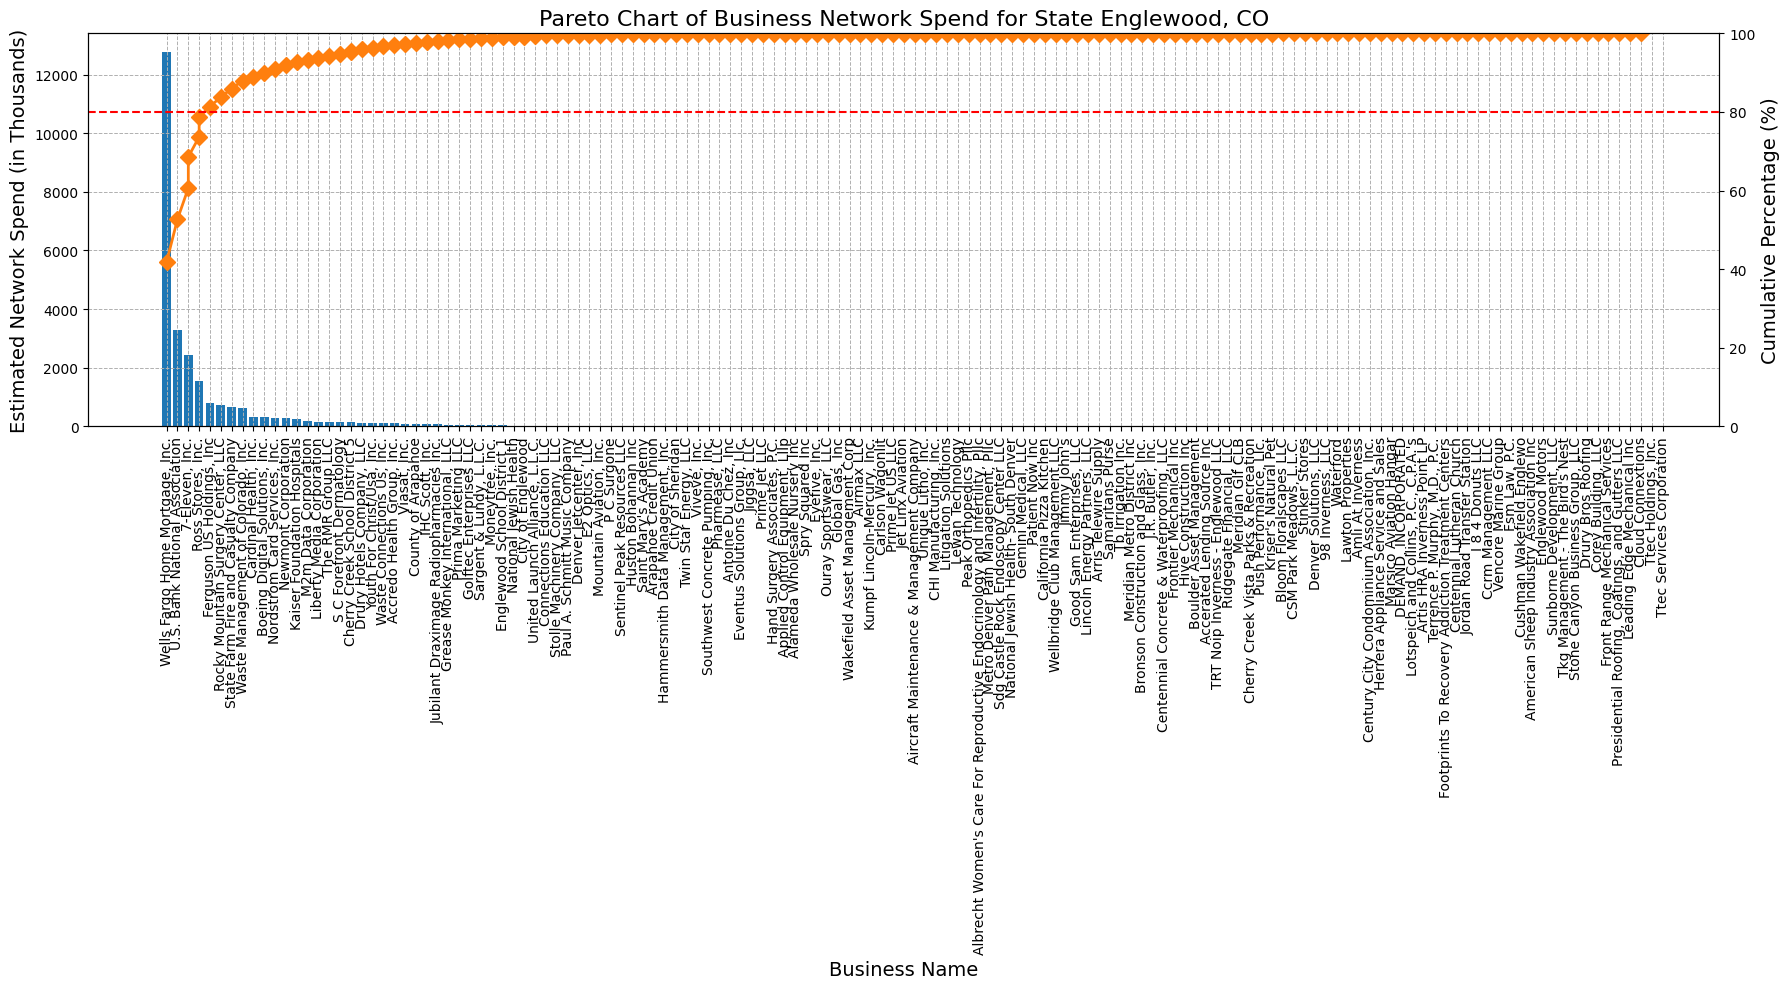

In [39]:
# Step 4: Create Network Spend Pareto chart with a larger size
fig, ax = plt.subplots(figsize=(18, 10))  # Increase figure size for better visibility
# Bar plot for BUS_EST_SECURITY_SPEND
ax.bar(df_filtered['BUSINESS_NAME'], df_filtered['EST_NETWORK_SPEND_2023'], color='C0')

# Line plot for Cumulative Percentage
ax2 = ax.twinx()
ax2.plot(df_filtered['BUSINESS_NAME'], df_filtered['Cumulative_Percentage'], color='C1', marker='D', ms=8, linestyle='-', linewidth=2)
ax2.axhline(y=80, color='r', linestyle='--')  # 80% line for Pareto principle
ax2.set_ylim(0, 100)

# Labeling
ax.set_xlabel('Business Name', fontsize=14)
ax.set_ylabel('Estimated Network Spend (in Thousands)', fontsize=14)  # Update ylabel to show spend in thousands
ax2.set_ylabel('Cumulative Percentage (%)', fontsize=14)
plt.title(f'Pareto Chart of Business Network Spend for State {city_filter}, {state_filter}', fontsize=16)

# Rotate x-axis labels
plt.xticks(rotation=90, ha='right', fontsize=10)
ax.tick_params(axis='x', labelrotation=90)

# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.7)
ax2.grid(False)  # Turn off grid for the secondary y-axis

plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
plt.show()

In [40]:
# Filter the data by state & city name
state_filter = 'CO'  # Specify the state you want to filter by
city_filter = 'Broomfield'                #'Broomfield'
df_filtered = df[(df['STATE_CD'] == state_filter) & (df['CITY'] == city_filter)]

In [42]:
# Sort the filtered data by BUS_EST_SECURITY_SPEND in descending order
df_filtered = df_filtered.sort_values(by='EST_SECURITY_SPEND_2023', ascending=False)

In [43]:
# Calculate the cumulative spend and cumulative percentage
df_filtered['Cumulative_Spend'] = df_filtered['EST_SECURITY_SPEND_2023'].cumsum()
df_filtered['Cumulative_Percentage'] = 100 * df_filtered['Cumulative_Spend'] / df_filtered['EST_SECURITY_SPEND_2023'].sum()

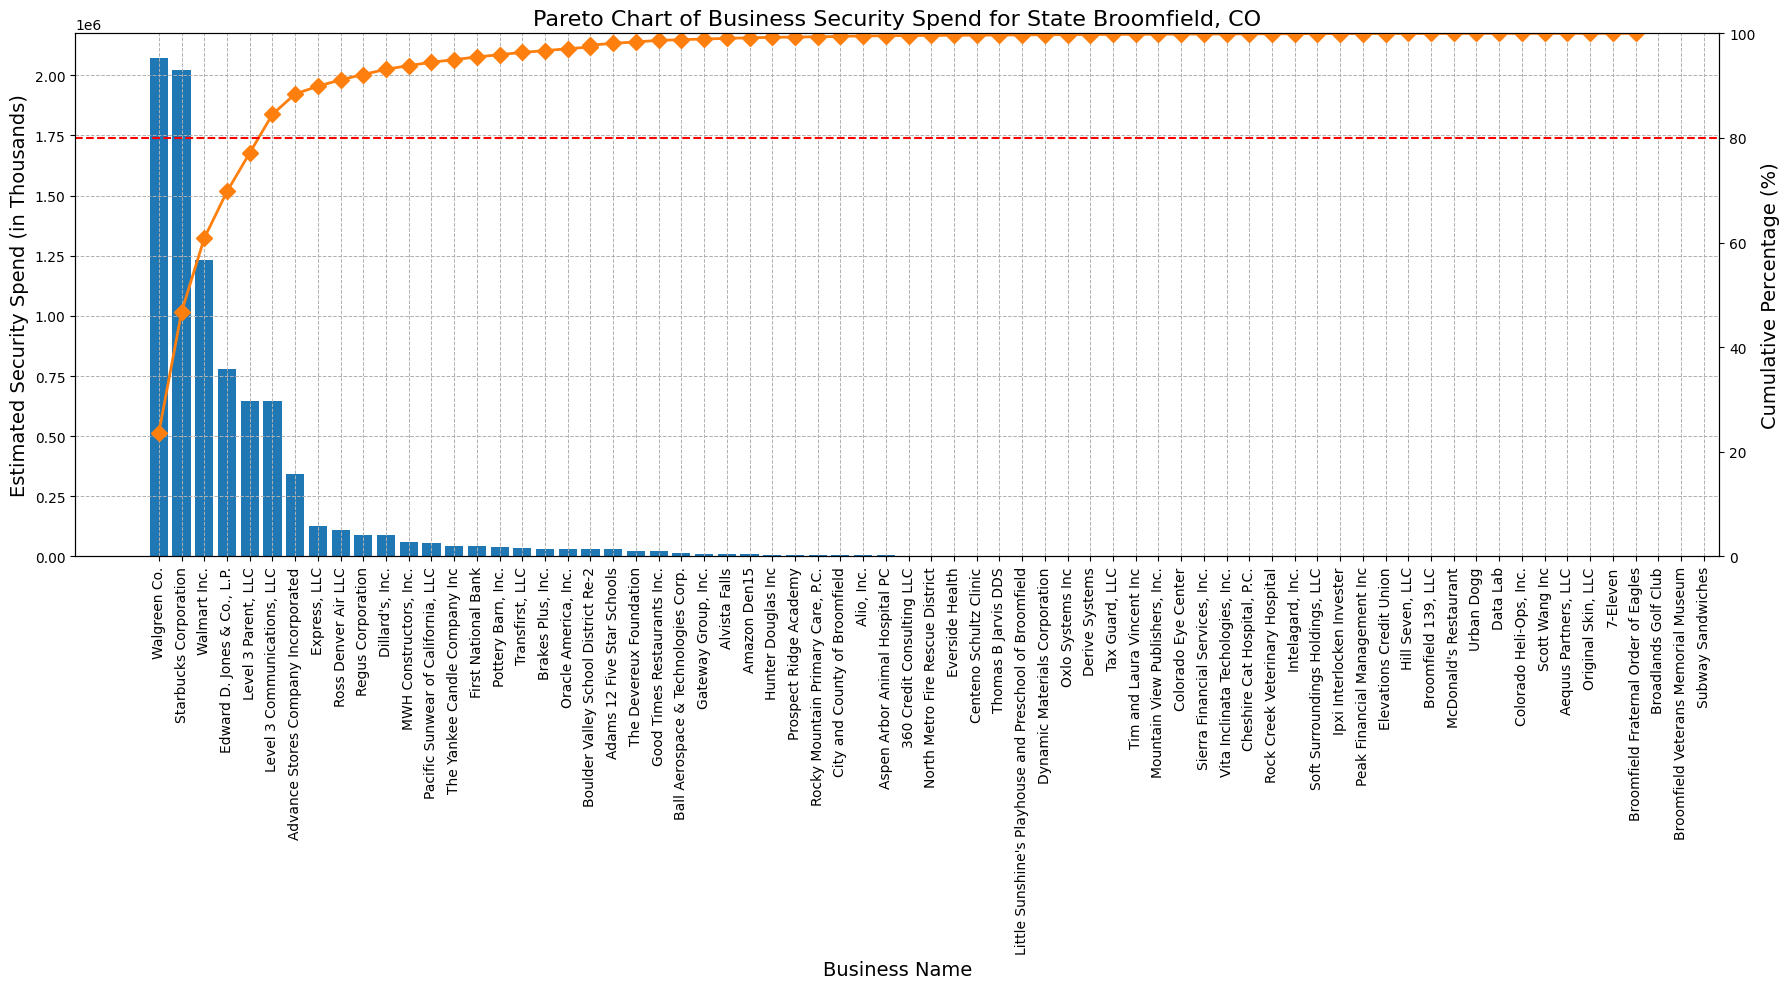

In [44]:
# Create the Security Spend Pareto chart with a larger size
fig, ax = plt.subplots(figsize=(18, 10))  # Increase figure size for better visibility
# Bar plot for BUS_EST_SECURITY_SPEND
ax.bar(df_filtered['BUSINESS_NAME'], df_filtered['EST_SECURITY_SPEND_2023'], color='C0')

# Line plot for Cumulative Percentage
ax2 = ax.twinx()
ax2.plot(df_filtered['BUSINESS_NAME'], df_filtered['Cumulative_Percentage'], color='C1', marker='D', ms=8, linestyle='-', linewidth=2)
ax2.axhline(y=80, color='r', linestyle='--')  # 80% line for Pareto principle
ax2.set_ylim(0, 100)

# Labeling
ax.set_xlabel('Business Name', fontsize=14)
ax.set_ylabel('Estimated Security Spend (in Thousands)', fontsize=14)  # Update ylabel to show spend in thousands
ax2.set_ylabel('Cumulative Percentage (%)', fontsize=14)
plt.title(f'Pareto Chart of Business Security Spend for State {city_filter}, {state_filter}', fontsize=16)

# Rotate x-axis labels
plt.xticks(rotation=90, ha='right', fontsize=10)
ax.tick_params(axis='x', labelrotation=90)

# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.7)
ax2.grid(False)  # Turn off grid for the secondary y-axis

plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
plt.show()

In [45]:
# Filter the data by state
state_filter = 'CO'  # Specify the state you want to filter by
city_filter = 'Broomfield'                #'Broomfield'
df_filtered = df[(df['STATE_CD'] == state_filter) & (df['CITY'] == city_filter)]

In [46]:
# Sort the filtered data by BUS_EST_VOICE_SPEND in descending order
df_filtered = df_filtered.sort_values(by='EST_VOICE_SPEND_2023', ascending=False)

In [47]:
# Calculate the cumulative spend and cumulative percentage
df_filtered['Cumulative_Spend'] = df_filtered['EST_VOICE_SPEND_2023'].cumsum()
df_filtered['Cumulative_Percentage'] = 100 * df_filtered['Cumulative_Spend'] / df_filtered['EST_VOICE_SPEND_2023'].sum()

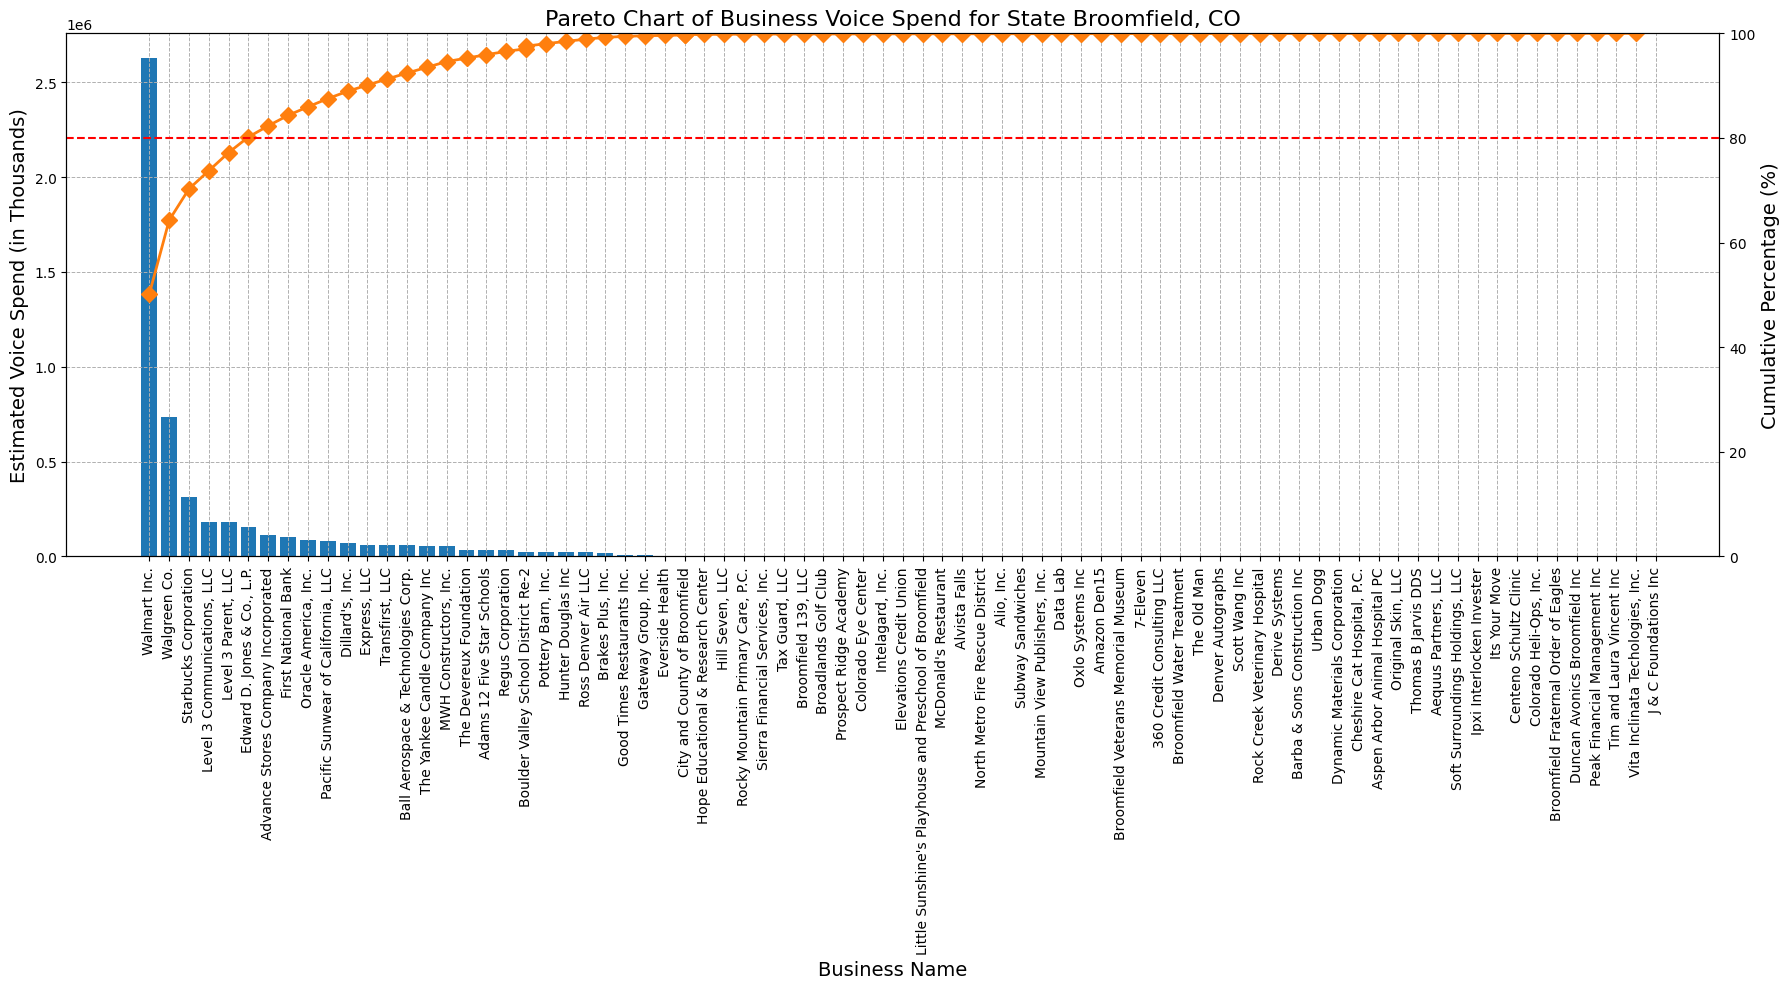

In [48]:
# Step 5: Create Voice Spend Pareto chart with a larger size
fig, ax = plt.subplots(figsize=(18, 10))  # Increase figure size for better visibility

# Bar plot for BUS_EST_VOICE_SPEND
ax.bar(df_filtered['BUSINESS_NAME'], df_filtered['EST_VOICE_SPEND_2023'], color='C0')

# Line plot for Cumulative Percentage
ax2 = ax.twinx()
ax2.plot(df_filtered['BUSINESS_NAME'], df_filtered['Cumulative_Percentage'], color='C1', marker='D', ms=8, linestyle='-', linewidth=2)
ax2.axhline(y=80, color='r', linestyle='--')  # 80% line for Pareto principle
ax2.set_ylim(0, 100)

# Labeling
ax.set_xlabel('Business Name', fontsize=14)
ax.set_ylabel('Estimated Voice Spend (in Thousands)', fontsize=14)  # Update ylabel to show spend in thousands
ax2.set_ylabel('Cumulative Percentage (%)', fontsize=14)
plt.title(f'Pareto Chart of Business Voice Spend for State {city_filter}, {state_filter}', fontsize=16)

# Rotate x-axis labels vertically
plt.xticks(rotation=90, ha='center', fontsize=10)
ax.tick_params(axis='x', labelrotation=90)

# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.7)
ax2.grid(False)  # Turn off grid for the secondary y-axis

plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
plt.show()

In [49]:
# Filter the data by state
state_filter = 'CO'  # Specify the state you want to filter by
city_filter = 'Broomfield'                #'Broomfield'
df_filtered = df[(df['STATE_CD'] == state_filter) & (df['CITY'] == city_filter)]

In [50]:
# Convert estimated voice spend to thousands
df_filtered['EST_SERVICES_SPEND_2023'] = df_filtered['EST_SERVICES_SPEND_2023'] / 1000

<ipython-input-50-44d9470582f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['EST_SERVICES_SPEND_2023'] = df_filtered['EST_SERVICES_SPEND_2023'] / 1000


In [51]:
# Sort the filtered data by EST_SERVICES_SPEND in descending order
df_filtered = df_filtered.sort_values(by='EST_SERVICES_SPEND_2023', ascending=False)

In [52]:
# Calculate the cumulative spend and cumulative percentage
df_filtered['Cumulative_Spend'] = df_filtered['EST_SERVICES_SPEND_2023'].cumsum()
df_filtered['Cumulative_Percentage'] = 100 * df_filtered['Cumulative_Spend'] / df_filtered['EST_SERVICES_SPEND_2023'].sum()

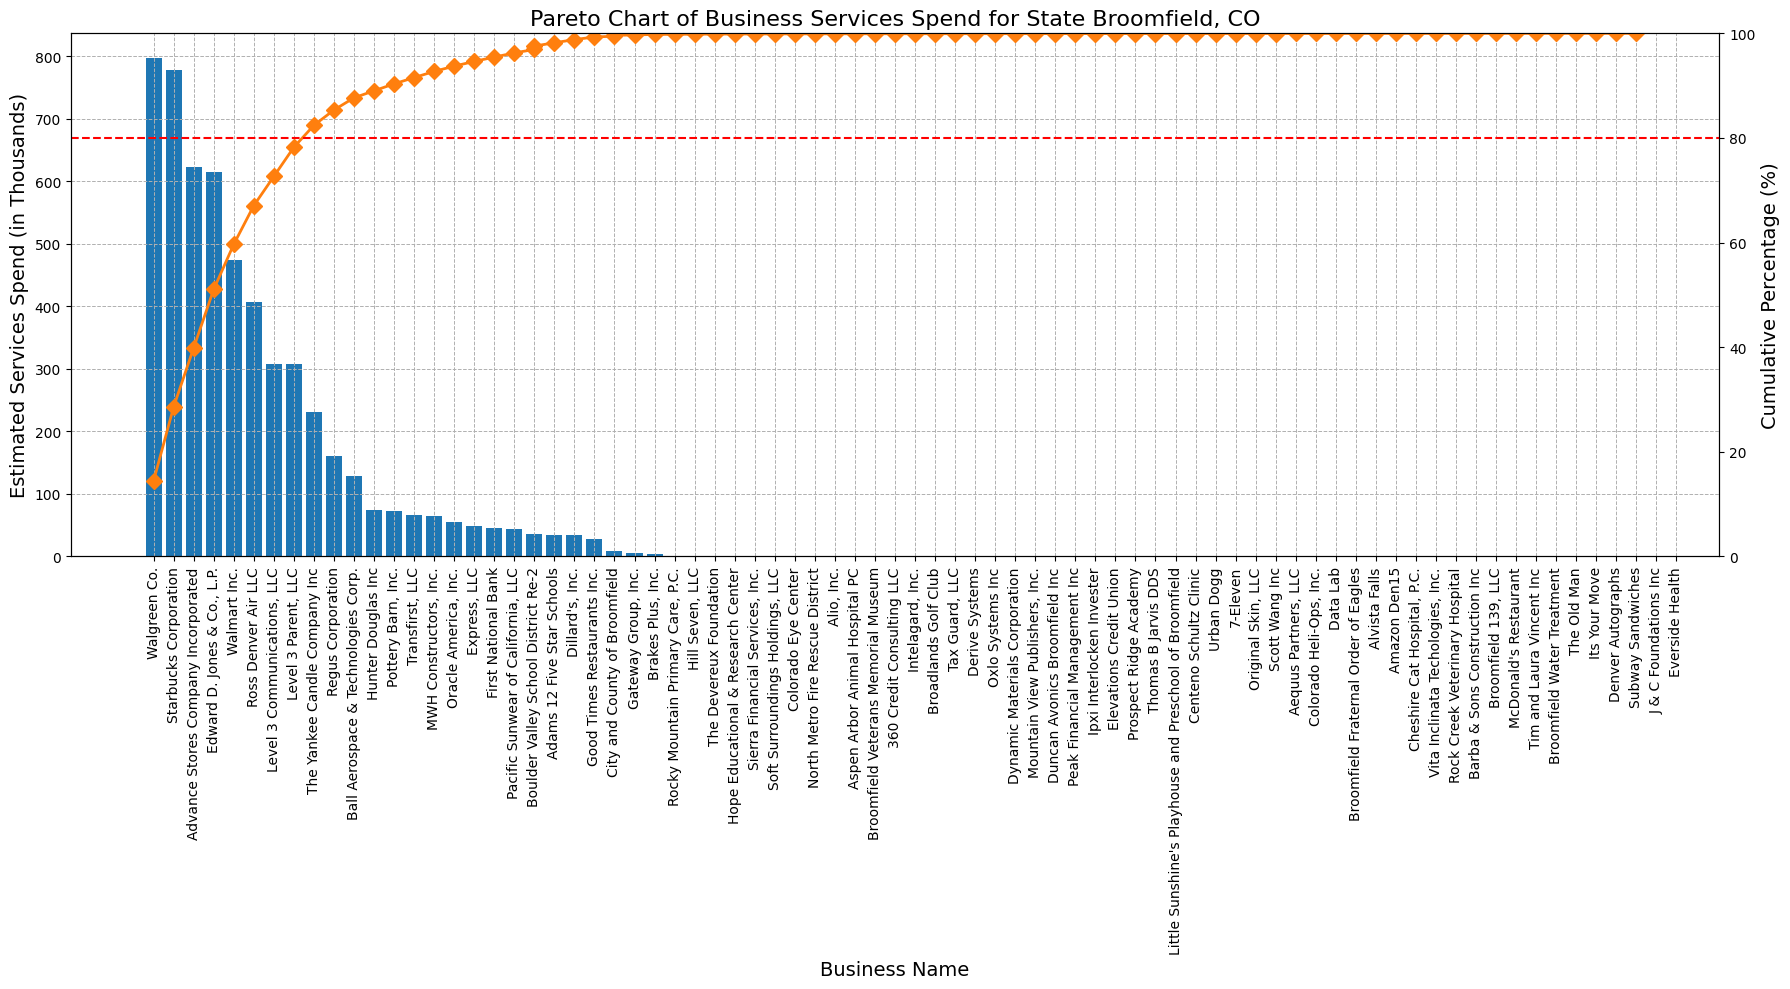

In [54]:
# Create Services Spend Pareto chart with a larger size
fig, ax = plt.subplots(figsize=(18, 10))  # Increase figure size for better visibility

# Bar plot for BUS_EST_TOT_SPEND
ax.bar(df_filtered['BUSINESS_NAME'], df_filtered['EST_SERVICES_SPEND_2023'], color='C0')

# Line plot for Cumulative Percentage
ax2 = ax.twinx()
ax2.plot(df_filtered['BUSINESS_NAME'], df_filtered['Cumulative_Percentage'], color='C1', marker='D', ms=8, linestyle='-', linewidth=2)
ax2.axhline(y=80, color='r', linestyle='--')  # 80% line for Pareto principle
ax2.set_ylim(0, 100)

# Labeling
ax.set_xlabel('Business Name', fontsize=14)
ax.set_ylabel('Estimated Services Spend (in Thousands)', fontsize=14)  # Update ylabel to show spend in thousands
ax2.set_ylabel('Cumulative Percentage (%)', fontsize=14)
plt.title(f'Pareto Chart of Business Services Spend for State {city_filter}, {state_filter}', fontsize=16)

# Rotate x-axis labels vertically
plt.xticks(rotation=90, ha='center', fontsize=10)
ax.tick_params(axis='x', labelrotation=90)

# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.7)
ax2.grid(False)  # Turn off grid for the secondary y-axis

plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
plt.show()

In [55]:
# Data Preparation to Prepare Pareto Chat for Total Spend - Filter the data by state
state_filter = 'CO'  # Specify the state you want to filter by
df_filtered = df[df['STATE_CD'] == state_filter]  # Filter by the STATE_CD column
city_filter = 'Broomfield'                #'Broomfield'
df_filtered = df[(df['STATE_CD'] == state_filter) & (df['CITY'] == city_filter)]

In [56]:
# Step 3: Sort the filtered data by BUS_EST_TOT_SPEND in descending order
df_filtered = df_filtered.sort_values(by='EST_TOT_SPEND_2023', ascending=False)

In [57]:
# Step 4: Display only the top n businesses
top_n = 500  # Change this value to show more or fewer businesses
df_top_n = df_filtered.head(top_n).copy()

In [58]:
# Convert total spend to thousands
df_top_n['EST_TOT_SPEND_2023'] = df_top_n['EST_TOT_SPEND_2023'] / 1000

In [59]:
# Calculate the cumulative spend and cumulative percentage
df_top_n['Cumulative_Spend'] = df_top_n['EST_TOT_SPEND_2023'].cumsum()
df_top_n['Cumulative_Percentage'] = 100 * df_top_n['Cumulative_Spend'] / df_top_n['EST_TOT_SPEND_2023'].sum()

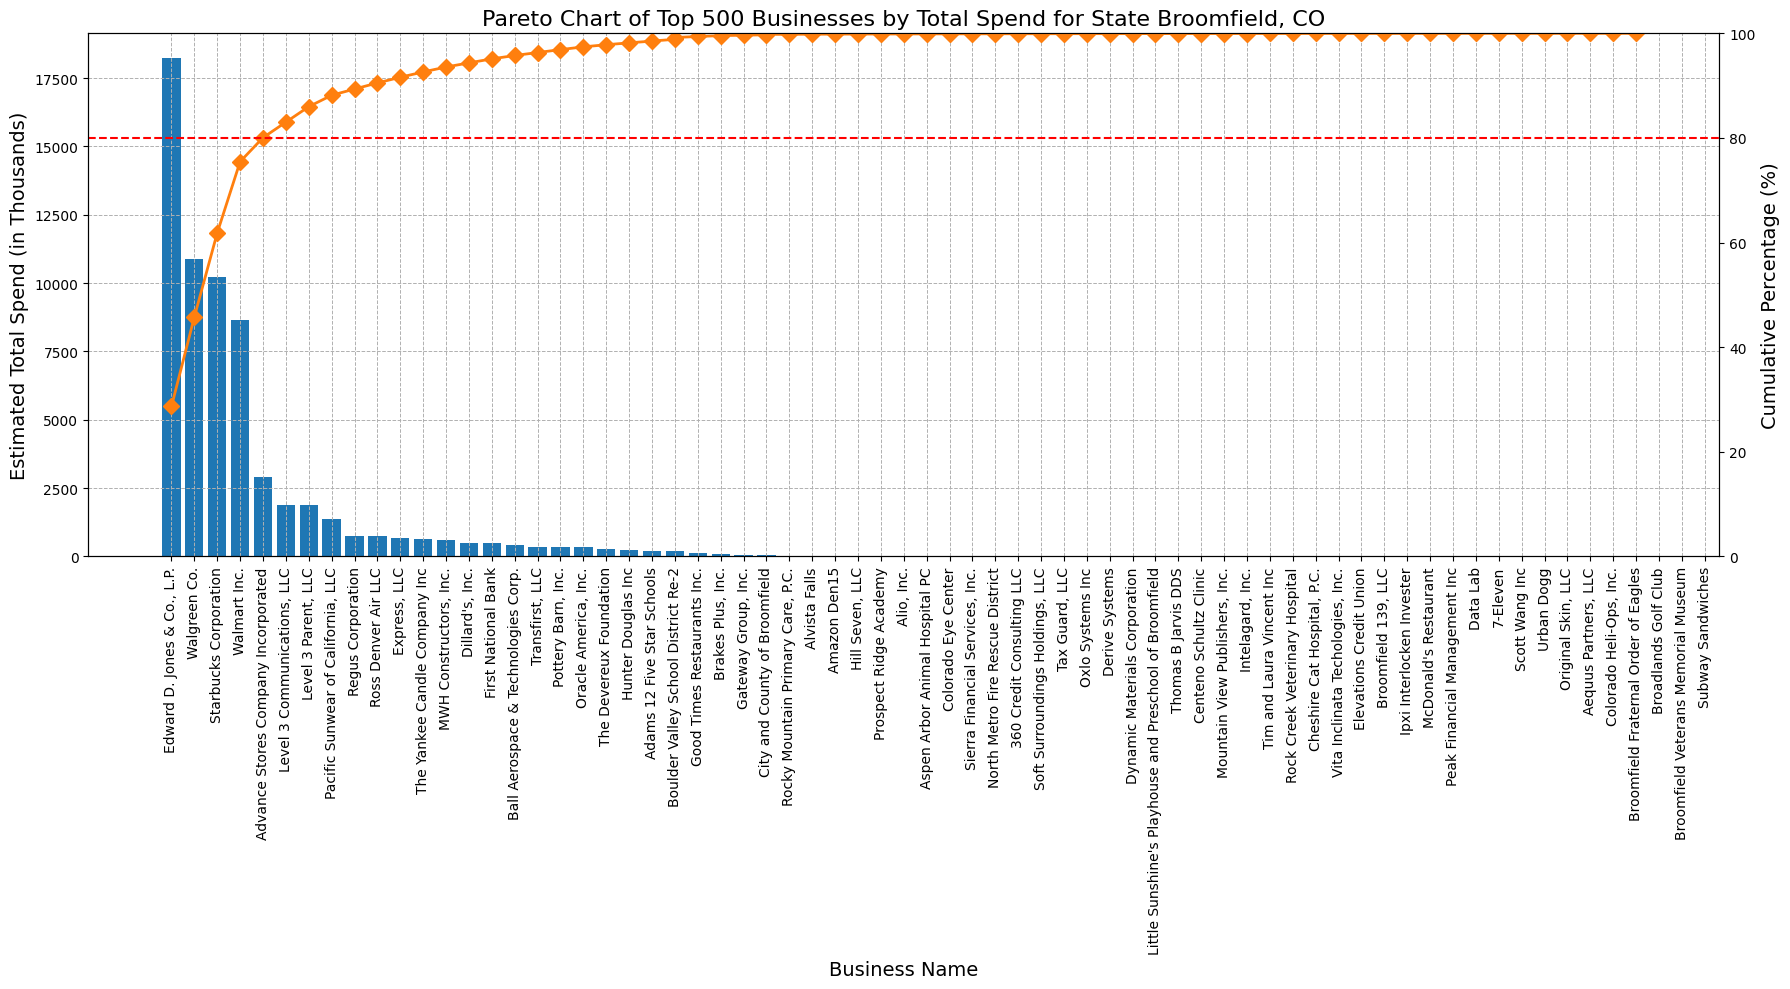

In [61]:
# Step 6: Create the Pareto chart with a larger size
fig, ax = plt.subplots(figsize=(18, 10))  # Increase figure size for better visibility

# Bar plot for BUS_EST_TOT_SPEND
ax.bar(df_top_n['BUSINESS_NAME'], df_top_n['EST_TOT_SPEND_2023'], color='C0')

# Line plot for Cumulative Percentage
ax2 = ax.twinx()
ax2.plot(df_top_n['BUSINESS_NAME'], df_top_n['Cumulative_Percentage'], color='C1', marker='D', ms=8, linestyle='-', linewidth=2)
ax2.axhline(y=80, color='r', linestyle='--')  # 80% line for Pareto principle
ax2.set_ylim(0, 100)

# Labeling
ax.set_xlabel('Business Name', fontsize=14)
ax.set_ylabel('Estimated Total Spend (in Thousands)', fontsize=14)  # Update ylabel to show spend in thousands
ax2.set_ylabel('Cumulative Percentage (%)', fontsize=14)
plt.title(f'Pareto Chart of Top {top_n} Businesses by Total Spend for State {city_filter}, {state_filter}', fontsize=16)

# Rotate x-axis labels vertically
plt.xticks(rotation=90, ha='center', fontsize=10)
ax.tick_params(axis='x', labelrotation=90)

# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.7)
ax2.grid(False)  # Turn off grid for the secondary y-axis

plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
plt.show()

In [62]:
# Now Lets visualize Top & Bottom 20 Business based upon their Spend
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
# Load your data into a DataFrame
df = pd.read_csv('/content/BUS_PROFILE_TELECOM.csv')  # Replace with your actual data file

In [65]:
top_20_network_spend = df.sort_values(by='EST_NETWORK_SPEND_2023', ascending=False).head(20)
print("Top 20 BUS_NAME by Network Spend:")
print(top_20_network_spend[['BUSINESS_NAME', 'EST_NETWORK_SPEND_2023']])

# For Security spend
top_20_security_spend = df.sort_values(by='EST_SECURITY_SPEND_2023', ascending=False).head(20)
print("\nTop 20 BUS_NAME by Security Spend:")
print(top_20_security_spend[['BUSINESS_NAME', 'EST_SECURITY_SPEND_2023']])

# For Voice spend
top_20_voice_spend = df.sort_values(by='EST_VOICE_SPEND_2023', ascending=False).head(20)
print("\nTop 20 BUS_NAME by Voice Spend:")
print(top_20_voice_spend[['BUSINESS_NAME', 'EST_VOICE_SPEND_2023']])

Top 20 BUS_NAME by Network Spend:
                               BUSINESS_NAME  EST_NETWORK_SPEND_2023
7194  Fish & Wildlife Service, United States             52010707.88
3834                     USDA Forest Service             52010707.88
2208        Publishing Office, US Government             52010707.88
2162             Edward D. Jones & Co., L.P.             16670778.27
2714             Edward D. Jones & Co., L.P.             16670778.27
4972             Edward D. Jones & Co., L.P.             16670778.27
7872             Edward D. Jones & Co., L.P.             16670778.27
8003             Edward D. Jones & Co., L.P.             16670778.27
2145             Edward D. Jones & Co., L.P.             16670778.27
5430             Edward D. Jones & Co., L.P.             16670778.27
3780             Edward D. Jones & Co., L.P.             16670778.27
4440             Edward D. Jones & Co., L.P.             16670778.27
1196             Edward D. Jones & Co., L.P.             16670778.27


<ipython-input-70-22cb7442d29c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='BUSINESS_NAME', data=top_20, palette='Blues_d')


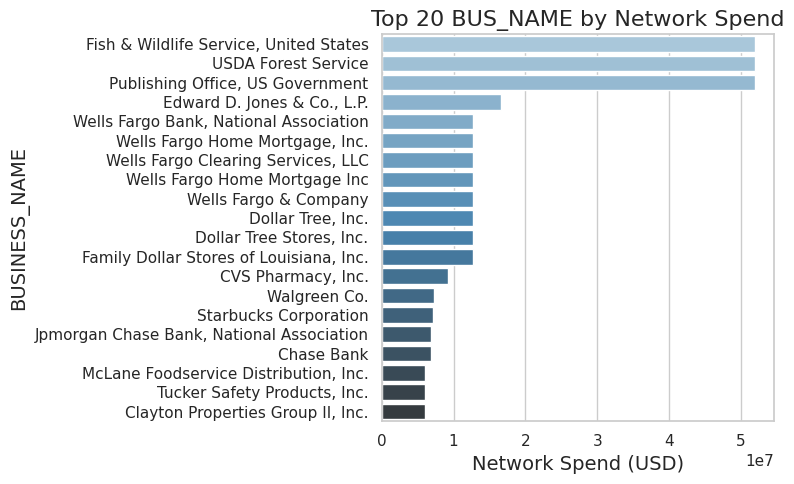

<ipython-input-70-22cb7442d29c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='BUSINESS_NAME', data=top_20, palette='Blues_d')


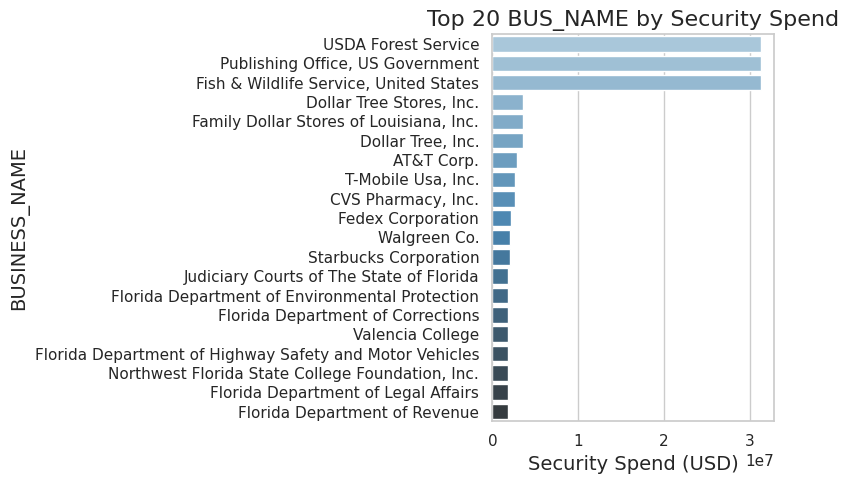

<ipython-input-70-22cb7442d29c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='BUSINESS_NAME', data=top_20, palette='Blues_d')


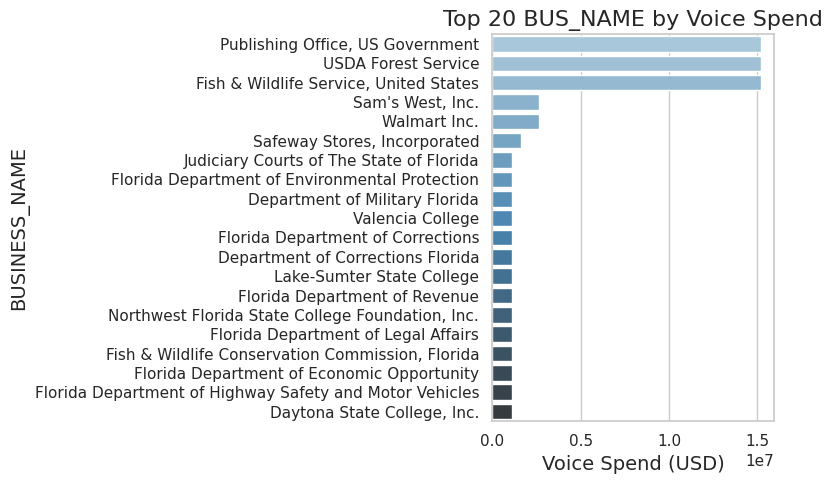

In [70]:
!pip install seaborn
import seaborn as sns # Added this line to import the seaborn module
# Set plot style
sns.set(style="whitegrid")

# Function to get top 20 unique BUS_NAME based on a specified spend column
def get_unique_top_20(df, column):
    df_sorted = df.sort_values(by=column, ascending=False)
    unique_top_20 = df_sorted.drop_duplicates(subset=['BUSINESS_NAME']).head(20)
    return unique_top_20

# Function to plot top 20 BUS_NAME for any spend category
def plot_top_20(df, column, title, spend_label):
    top_20 = get_unique_top_20(df, column)
    plt.figure(figsize=(8, 5))
    sns.barplot(x=column, y='BUSINESS_NAME', data=top_20, palette='Blues_d')
    plt.title(f'Top 20 BUS_NAME by {title}', fontsize=16)
    plt.xlabel(f'{spend_label} Spend (USD)', fontsize=14)
    plt.ylabel('BUSINESS_NAME', fontsize=14)
    plt.tight_layout()
    plt.show()

# For Network spend
plot_top_20(df, 'EST_NETWORK_SPEND_2023', 'Network Spend', 'Network')

# For Security spend
plot_top_20(df, 'EST_SECURITY_SPEND_2023', 'Security Spend', 'Security')

# For Voice spend
plot_top_20(df, 'EST_VOICE_SPEND_2023', 'Voice Spend', 'Voice')

In [ ]:
# Bottom 20 Business based upon Spend

In [71]:
# Function to get bottom 20 unique BUS_NAME for a specific state and city based on a specified spend column
def get_unique_bottom_20(df, column, state_filter, city_filter):
    # Filter by state and city
    df_filtered = df[(df['STATE_CD'] == state_filter) & (df['CITY'] == city_filter)]
    # Drop duplicates by BUS_NAME
    df_unique = df_filtered.drop_duplicates(subset=['BUSINESS_NAME'])
    # Sort by the column in ascending order (smallest values)
    df_sorted = df_unique.sort_values(by=column, ascending=True)
    # Take the bottom 20 rows after ensuring uniqueness
    bottom_20 = df_sorted.head(20)
    return bottom_20

In [72]:
# Function to plot bottom 20 BUS_NAME for any spend category
def plot_bottom_20(df, column, title, spend_label, state_filter, city_filter):
    bottom_20 = get_unique_bottom_20(df, column, state_filter, city_filter)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=column, y='BUSINESS_NAME', data=bottom_20, palette='Reds_d')
    plt.title(f'Bottom 20 Unique BUS_NAME by {title}', fontsize=16)
    plt.xlabel(f'{spend_label} Spend (USD)', fontsize=14)
    plt.ylabel('BUSINESS_NAME', fontsize=14)
    plt.tight_layout()
    plt.show()

<ipython-input-72-1b81cb684e54>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='BUSINESS_NAME', data=bottom_20, palette='Reds_d')


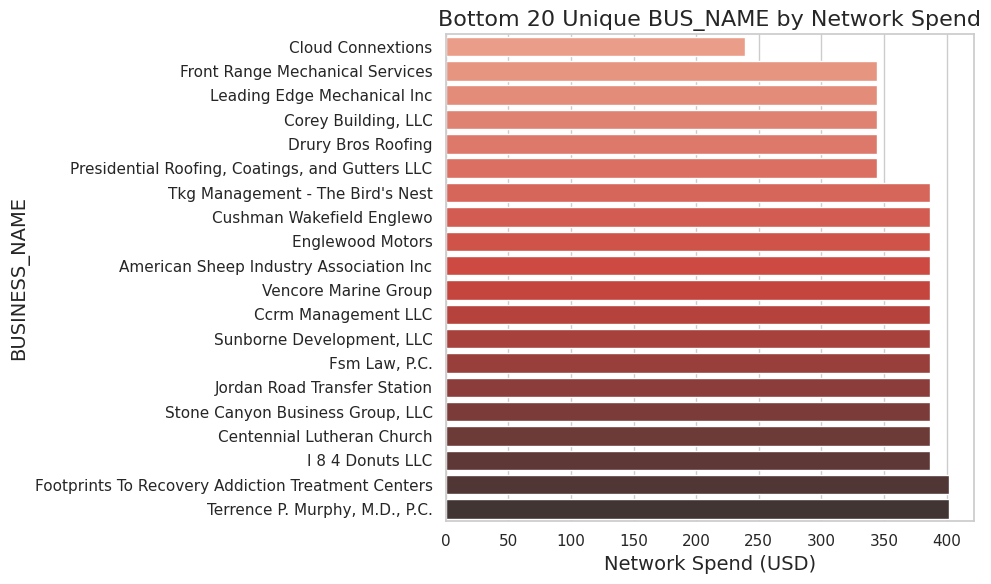

<ipython-input-72-1b81cb684e54>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='BUSINESS_NAME', data=bottom_20, palette='Reds_d')


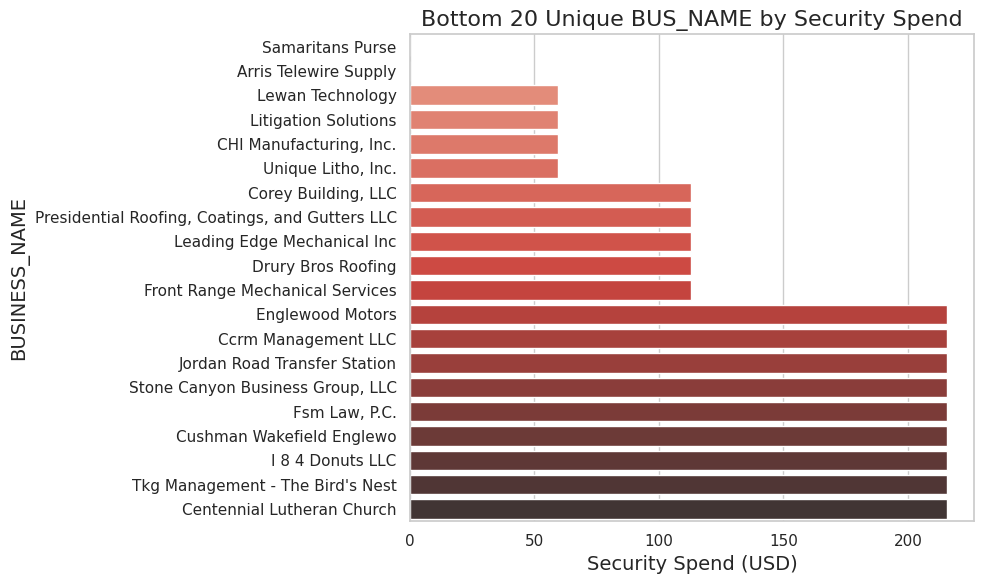

<ipython-input-72-1b81cb684e54>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='BUSINESS_NAME', data=bottom_20, palette='Reds_d')


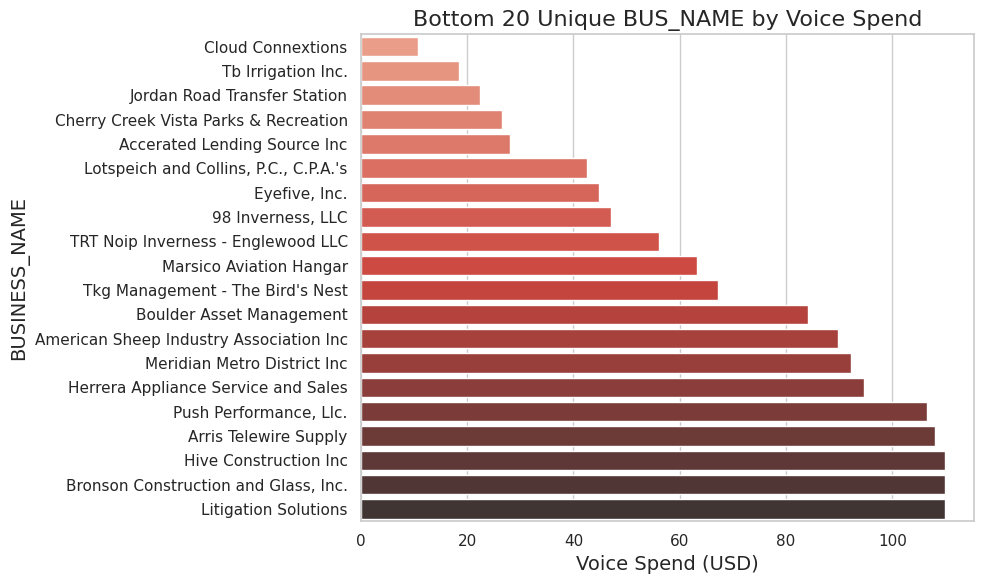

In [73]:
# Set the filters for state and city
state_filter = 'CO'
city_filter = 'Englewood'

# For Network spend (Bottom 20 in Denver, CO)
plot_bottom_20(df, 'EST_NETWORK_SPEND_2023', 'Network Spend', 'Network', state_filter, city_filter)

# For Security spend (Bottom 20 in Denver, CO)
plot_bottom_20(df, 'EST_SECURITY_SPEND_2023', 'Security Spend', 'Security', state_filter, city_filter)

# For Voice spend (Bottom 20 in Denver, CO)
plot_bottom_20(df, 'EST_VOICE_SPEND_2023', 'Voice Spend', 'Voice', state_filter, city_filter)

In [74]:
# Correlation Analysis Between Network, Security, Voice and Services Spend

In [78]:
# Calculate the correlation matrix
correlation_matrix = data[['EST_NETWORK_SPEND_2023', 'EST_VOICE_SPEND_2023', 'EST_SECURITY_SPEND_2023','EST_SERVICES_SPEND_2023']].corr()

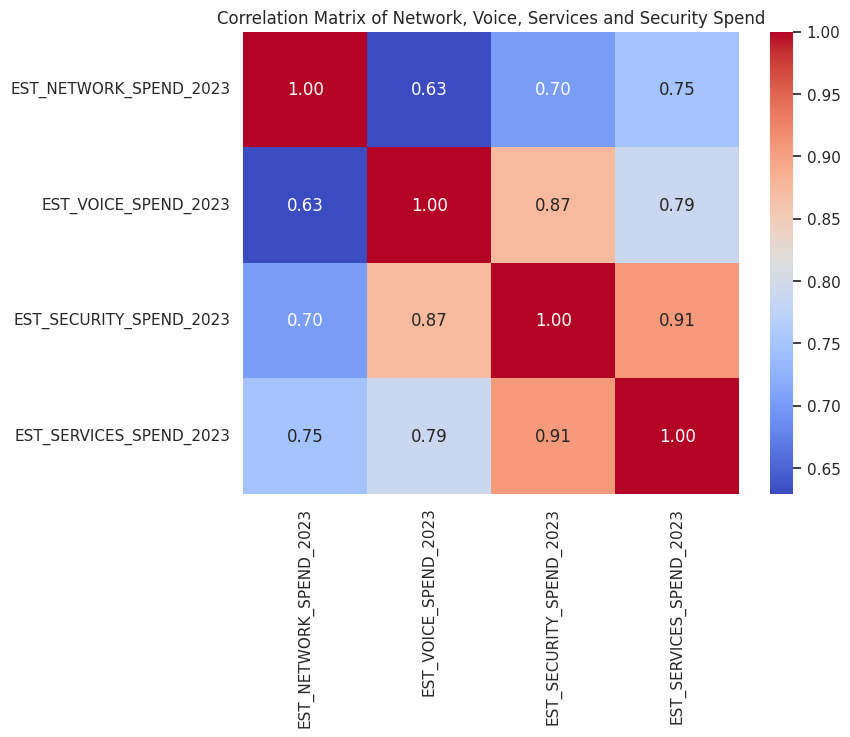

In [77]:
# Visualize the correlation matrix using a heatmap
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Network, Voice, Services and Security Spend')
plt.show()

**Here is a quick interpretation of the heatmap:**

  *  . EST_NETWORK_SPEND_2023 has moderate to strong correlations with the other spend categories: 0.63 with voice, 0.70 with security, and 0.75 with services.

*    . EST_VOICE_SPEND_2023 has a strong correlation with security spend (0.87) and a somewhat strong correlation with services spend (0.79).

*    . EST_SECURITY_SPEND_2023 and EST_SERVICES_SPEND_2023 have a very strong correlation (0.91).

Here are further insights from the Correlation Matrx Data:

**Bundled Offerings**: Since security and services spending are highly correlated, offering bundled packages that combine these two areas could drive higher overall spending.

**Cross-Selling**: Strong correlations between security, services, and voice/network spend suggest cross-selling opportunities. Target security-focused customers with voice and network solutions.

**Marketing Strategy**: Focus marketing efforts on combined security and services solutions, especially for customers with significant network or voice spending.

**Lets work On Customer Segmentation and Classification**

In [81]:
# Select relevant columns for segmentation
spend_columns = [
    'EST_NETWORK_SPEND_2023',
    'EST_SECURITY_SPEND_2023',
    'EST_VOICE_SPEND_2023',
    'EST_SERVICES_SPEND_2023',
    'EST_TOT_SPEND_2023'
]

In [85]:
# Filter out rows with missing values in the selected columns
data = data.dropna(subset=spend_columns)

In [86]:
# Data Prepration - Normalize the data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[spend_columns])

In [87]:
!pip install matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

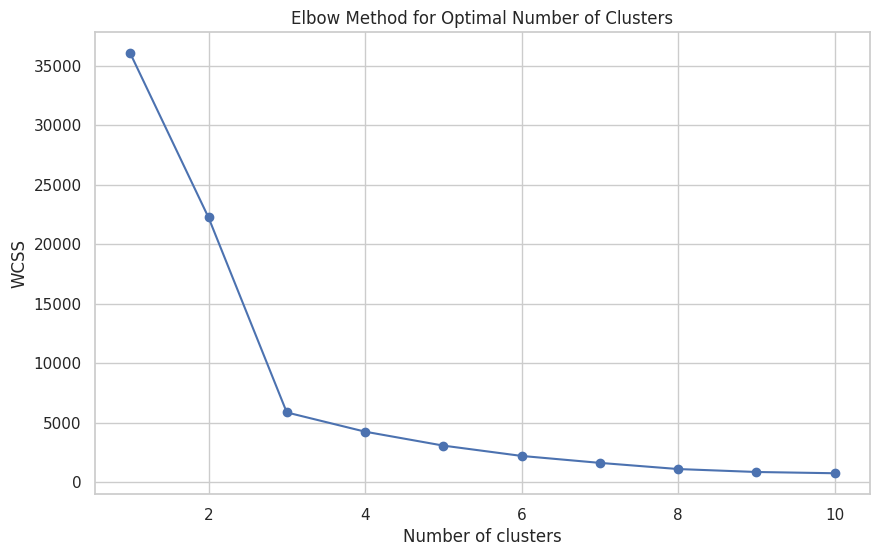

In [88]:
# Import the KMeans class
from sklearn.cluster import KMeans

# Calculate WCSS for different cluster numbers
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42) # Initialize KMeans with i clusters
    kmeans.fit(scaled_data) # Fit the model to your scaled data
    wcss.append(kmeans.inertia_) # Append the inertia_ (WCSS) to the list

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [89]:
# Determine the optimal number of clusters (e.g., from the Elbow method)
optimal_n_clusters = 3

# Fit KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Get cluster assignments and add them to the DataFrame
data['Cluster'] = kmeans.labels_

# Now we can calculate the Silhouette Score
silhouette_avg = silhouette_score(scaled_data, data['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.9070569174892819


In [90]:
# From the plot, choose the optimal number of clusters
optimal_clusters = 3

In [91]:
# Apply K-Means clustering
#kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
#data['Cluster'] = kmeans.fit_predict(scaled_data)

In [92]:
# Get cluster labels for each data point - Print the members
cluster_labels = kmeans.labels_

In [93]:
# Create a pandas DataFrame to store the data points and their respective cluster labels
df_k = pd.DataFrame(scaled_data)
df_k['Cluster'] = cluster_labels

In [94]:
# To count the number of members in each cluster
cluster_counts = df_k['Cluster'].value_counts().sort_index()

# Print the number of members in each cluster
for cluster_num, count in cluster_counts.items():
    print(f'Cluster {cluster_num}: {count} members')

Cluster 0: 6812 members
Cluster 1: 395 members
Cluster 2: 3 members


In [95]:
# Define the threshold for high-value customers
# Assuming that the threshold for each spend category is set as the 75th percentile of the data
network_threshold = data['EST_NETWORK_SPEND_2023'].quantile(0.75) # Use 'data' instead of 'df'
security_threshold = data['EST_SECURITY_SPEND_2023'].quantile(0.75) # Use 'data' instead of 'df'
voice_threshold = data['EST_VOICE_SPEND_2023'].quantile(0.75) # Use 'data' instead of 'df'
services_threshold = data['EST_SERVICES_SPEND_2023'].quantile(0.75) # Use 'data' instead of 'df'
tot_spend_threshold = data['EST_TOT_SPEND_2023'].quantile(0.75) # Use 'data' instead of 'df'

In [96]:
# Define the threshold for medium-value customers
# Assuming that the threshold for each spend category is set as the 75th percentile of the data
network_threshold_med = data['EST_NETWORK_SPEND_2023'].quantile(0.50) # Use 'data' instead of 'df'
security_threshold_med = data['EST_SECURITY_SPEND_2023'].quantile(0.50) # Use 'data' instead of 'df'
voice_threshold_med = data['EST_VOICE_SPEND_2023'].quantile(0.50) # Use 'data' instead of 'df'
services_threshold_med = data['EST_SERVICES_SPEND_2023'].quantile(0.50) # Use 'data' instead of 'df'
tot_spend_threshold_med = data['EST_TOT_SPEND_2023'].quantile(0.50) # Use 'data' instead of 'df'

In [97]:
def classify_customer(row):
    # Check for High-Value customers
    if (row['EST_NETWORK_SPEND_2023'] >= network_threshold or
        row['EST_SECURITY_SPEND_2023'] >= security_threshold or
        row['EST_VOICE_SPEND_2023'] >= voice_threshold or
        row['EST_SERVICES_SPEND_2023'] >= services_threshold or
        row['EST_TOT_SPEND_2023'] >= tot_spend_threshold):
        return 'High-Value'

    # Check for Medium-Value customers
    elif (row['EST_NETWORK_SPEND_2023'] >= network_threshold_med or
          row['EST_SECURITY_SPEND_2023'] >= security_threshold_med or
          row['EST_VOICE_SPEND_2023'] >= voice_threshold_med or
          row['EST_SERVICES_SPEND_2023'] == services_threshold_med or
          row['EST_TOT_SPEND_2023'] == tot_spend_threshold_med):
        return 'Medium-Value'

    # Return Low-Value if none of the above conditions are met
    else:
        return 'Low-Value'

In [98]:
# Apply the classification
data['Customer_Segment'] = data.apply(classify_customer, axis=1)

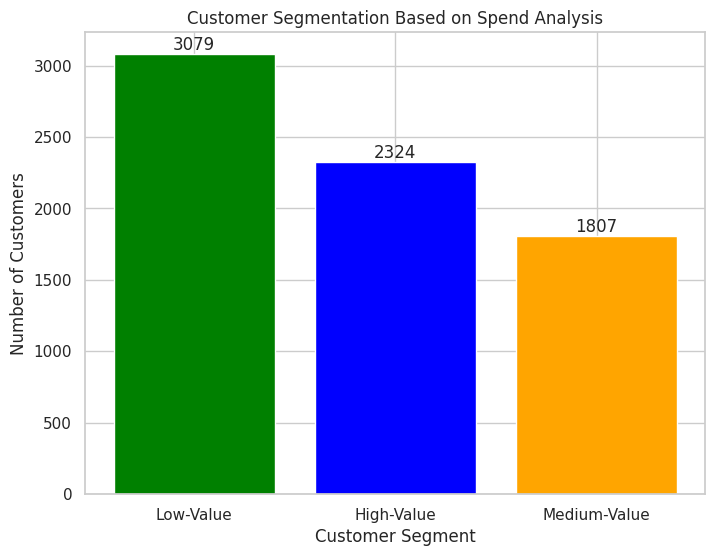

In [100]:
segment_counts = data['Customer_Segment'].value_counts()  # Use 'data' instead of 'df'
plt.figure(figsize=(8, 6))
bars = plt.bar(segment_counts.index, segment_counts.values, color=['green', 'blue', 'orange'])

# Add numbers on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.title('Customer Segmentation Based on Spend Analysis')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.show()

In [101]:
# Display the first few rows of the dataframe with the new segmentation
#data.head()

In [102]:
# Save the dataframe to a CSV file
#data.to_csv('/content/segmented_customers.csv', index=False) # Changed 'df' to 'data'

# Provide a link to download the CSV file
# from google.colab import files
# files.download('/content/segmented_customers.csv')

<Figure size 1200x800 with 0 Axes>

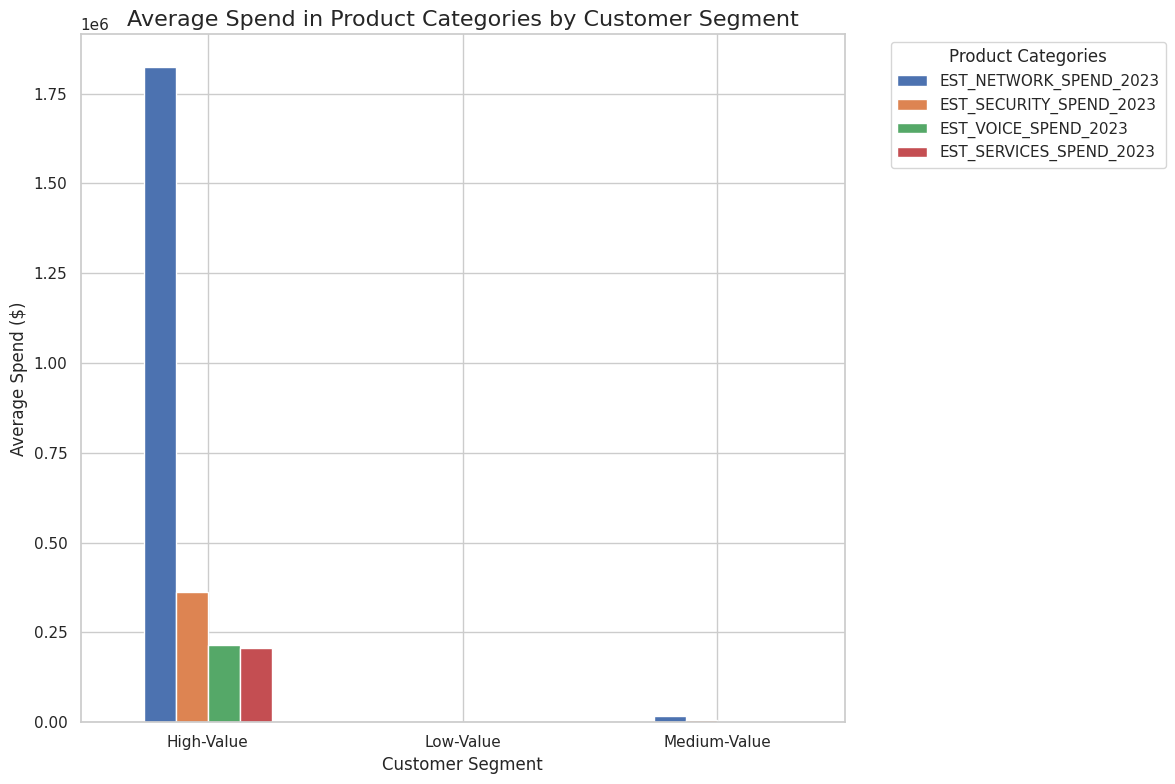

In [103]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set Seaborn theme for better visuals
sns.set(style='whitegrid')

# Group data by Customer_Segment and calculate mean spend for each product category
# Convert selected columns to numeric type before calculating the mean
grouped_data = data.groupby('Customer_Segment').agg({
    'EST_NETWORK_SPEND_2023': 'mean',
    'EST_SECURITY_SPEND_2023': 'mean',
    'EST_VOICE_SPEND_2023': 'mean',
    'EST_SERVICES_SPEND_2023': 'mean'
})


# Plot the data using a bar plot
plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar', figsize=(12, 8))

# Set plot labels and title
plt.title('Average Spend in Product Categories by Customer Segment', fontsize=16)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Average Spend ($)', fontsize=12)
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.legend(title='Product Categories', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

In [104]:
import pandas as pd

# Group data by Customer_Segment and calculate the mean for each product category
# Convert selected columns to numeric type before calculating the mean
grouped_data = data.groupby('Customer_Segment').agg({
    'EST_NETWORK_SPEND_2023': 'mean',
    'EST_SECURITY_SPEND_2023': 'mean',
    'EST_VOICE_SPEND_2023': 'mean',
    'EST_SERVICES_SPEND_2023': 'mean'
})

# Display the data in tabular format
print(grouped_data)

                  EST_NETWORK_SPEND_2023  EST_SECURITY_SPEND_2023  \
Customer_Segment                                                    
High-Value                  1.823919e+06            361326.087474   
Low-Value                   5.671083e+02               903.608347   
Medium-Value                1.812563e+04              7545.828080   

                  EST_VOICE_SPEND_2023  EST_SERVICES_SPEND_2023  
Customer_Segment                                                 
High-Value               214541.819918            207524.407487  
Low-Value                   175.823995               134.817113  
Medium-Value               2656.187084              4234.444250  


Overall summary is:

For Network:
High-Value customers are estimated to spend 1.82 million dollars.
Medium-Value customers are estimated to spend 18,125 dollars.
Low-Value customers are estimated to spend just over 567 dollars.

For SECURITY:

High-Value customers are estimated to spend 361,326 dollars.
Medium-Value customers are estimated to spend around 7,546 dollars.
Low-Value customers are estimated to spend 904 dollars.

For Voice:

High-Value customers are estimated to spend 214,542 dollars.
Medium-Value customers are estimated to spend 2,656 dollars.
Low-Value customers are estimated to spend around 176 dollars.

For Service:

High-Value customers are estimated to spend 207,524 dollars.
Medium-Value customers are estimated to spend 4,234 dollars.
Low-Value customers are estimated to spend around 135 dollars.

Interpretation:
High-Value customers are spending significantly more across all categories (Network, Security, Voice, Services) than Medium- and Low-Value customers.

Medium-Value customers are in the middle but are still far below the spending levels of High-Value customers.

Low-Value customers have much smaller spending, indicating their lower demand or usage of these services.

Business problem: How to prioritize and target customers based on value?

In [108]:
# Now build classification model
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [109]:
# Input Features
X = data[['EST_NETWORK_SPEND_2023', 'EST_SECURITY_SPEND_2023', 'EST_VOICE_SPEND_2023', 'EST_SERVICES_SPEND_2023']]

# Target Variable (Customer Segment)
y = data['Customer_Segment']

In [110]:
# Encode the target variable into numerical format
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # This will convert 'High-Value', 'Medium-Value', 'Low-Value' into numerical values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [111]:
# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = decision_tree.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt, target_names=label_encoder.classes_))

Decision Tree Classifier:
Accuracy: 0.9958391123439667
              precision    recall  f1-score   support

  High-Value       0.99      0.99      0.99       672
   Low-Value       1.00      1.00      1.00       903
Medium-Value       0.99      0.99      0.99       588

    accuracy                           1.00      2163
   macro avg       1.00      1.00      1.00      2163
weighted avg       1.00      1.00      1.00      2163



In [112]:
# Initialize the Logistic Regression model
logistic_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logistic_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = logistic_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr, target_names=label_encoder.classes_))

Logistic Regression Classifier:
Accuracy: 0.9750346740638003
              precision    recall  f1-score   support

  High-Value       0.98      0.99      0.98       672
   Low-Value       0.98      0.98      0.98       903
Medium-Value       0.96      0.94      0.95       588

    accuracy                           0.98      2163
   macro avg       0.97      0.97      0.97      2163
weighted avg       0.97      0.98      0.97      2163



In [113]:
# Initialize the Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest.predict(X_test)

# Evaluate the model
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

Random Forest Classifier:
Accuracy: 0.9981507165973186
              precision    recall  f1-score   support

  High-Value       1.00      1.00      1.00       672
   Low-Value       1.00      1.00      1.00       903
Medium-Value       1.00      0.99      1.00       588

    accuracy                           1.00      2163
   macro avg       1.00      1.00      1.00      2163
weighted avg       1.00      1.00      1.00      2163



In [114]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [115]:
# Initialize the Gradient Boosting Classifier
gbm = GradientBoostingClassifier(random_state=42)

# Train the model
gbm.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gbm = gbm.predict(X_test)

# Evaluate the model
print("Gradient Boosting Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_gbm))
print(classification_report(y_test, y_pred_gbm, target_names=label_encoder.classes_))

Gradient Boosting Classifier:
Accuracy: 1.0
              precision    recall  f1-score   support

  High-Value       1.00      1.00      1.00       672
   Low-Value       1.00      1.00      1.00       903
Medium-Value       1.00      1.00      1.00       588

    accuracy                           1.00      2163
   macro avg       1.00      1.00      1.00      2163
weighted avg       1.00      1.00      1.00      2163



In [116]:
# Input Features - For SVM & KNN
X = data[['EST_NETWORK_SPEND_2023', 'EST_SECURITY_SPEND_2023', 'EST_VOICE_SPEND_2023', 'EST_SERVICES_SPEND_2023']]

# Target Variable (Customer Segment)
y = data['Customer_Segment']

# Encode the target variable into numerical format
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the features for SVM and KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [117]:
# Initialize the Support Vector Classifier
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model
print("Support Vector Machine Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_))


Support Vector Machine Classifier:
Accuracy: 0.7572815533980582
              precision    recall  f1-score   support

  High-Value       0.99      0.97      0.98       672
   Low-Value       0.64      1.00      0.78       903
Medium-Value       0.82      0.14      0.24       588

    accuracy                           0.76      2163
   macro avg       0.82      0.70      0.67      2163
weighted avg       0.80      0.76      0.70      2163



In [118]:
# Initialize the K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate the model
print("K-Nearest Neighbors Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn, target_names=label_encoder.classes_))

K-Nearest Neighbors Classifier:
Accuracy: 0.9884419787332409
              precision    recall  f1-score   support

  High-Value       0.99      0.99      0.99       672
   Low-Value       0.99      1.00      0.99       903
Medium-Value       0.99      0.97      0.98       588

    accuracy                           0.99      2163
   macro avg       0.99      0.99      0.99      2163
weighted avg       0.99      0.99      0.99      2163



In [119]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to evaluate the model
def evaluate_model(model, X_test, y_test, model_name):
    # Make predictions
    y_pred = model.predict(X_test)

    # Accuracy Score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")

    # Classification Report
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

Decision Tree Accuracy: 0.9958
Decision Tree Classification Report:
              precision    recall  f1-score   support

  High-Value       0.99      0.99      0.99       672
   Low-Value       1.00      1.00      1.00       903
Medium-Value       0.99      0.99      0.99       588

    accuracy                           1.00      2163
   macro avg       1.00      1.00      1.00      2163
weighted avg       1.00      1.00      1.00      2163



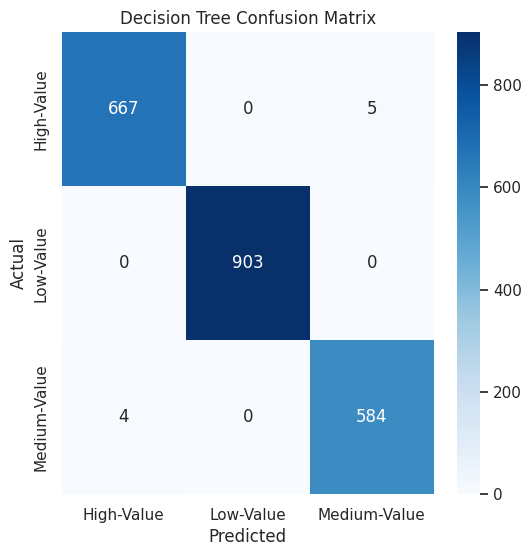

Random Forest Accuracy: 0.9982
Random Forest Classification Report:
              precision    recall  f1-score   support

  High-Value       1.00      1.00      1.00       672
   Low-Value       1.00      1.00      1.00       903
Medium-Value       1.00      0.99      1.00       588

    accuracy                           1.00      2163
   macro avg       1.00      1.00      1.00      2163
weighted avg       1.00      1.00      1.00      2163



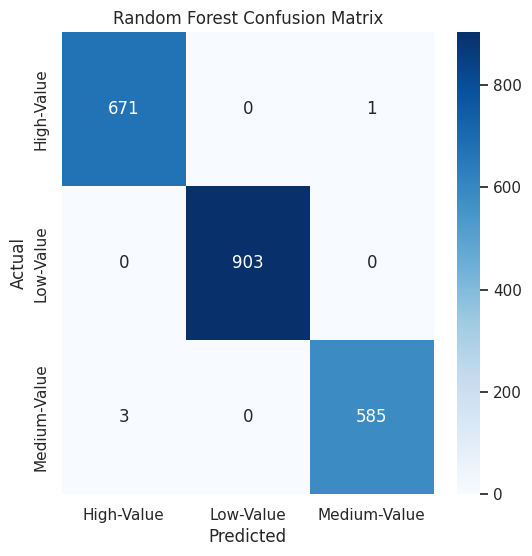

Logistic Regression Accuracy: 0.9750
Logistic Regression Classification Report:
              precision    recall  f1-score   support

  High-Value       0.98      0.99      0.98       672
   Low-Value       0.98      0.98      0.98       903
Medium-Value       0.96      0.94      0.95       588

    accuracy                           0.98      2163
   macro avg       0.97      0.97      0.97      2163
weighted avg       0.97      0.98      0.97      2163



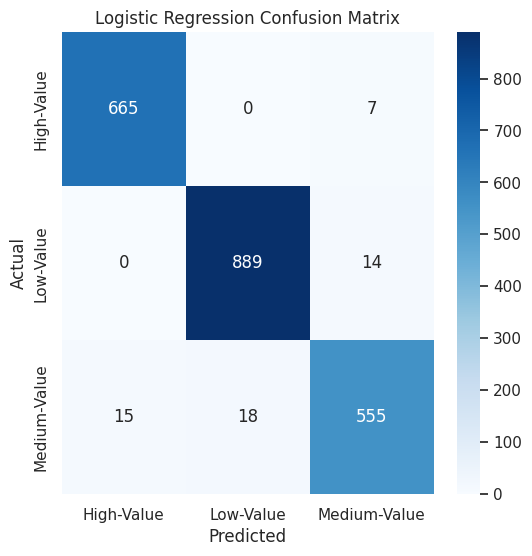

Gradient Boosting Accuracy: 1.0000
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

  High-Value       1.00      1.00      1.00       672
   Low-Value       1.00      1.00      1.00       903
Medium-Value       1.00      1.00      1.00       588

    accuracy                           1.00      2163
   macro avg       1.00      1.00      1.00      2163
weighted avg       1.00      1.00      1.00      2163



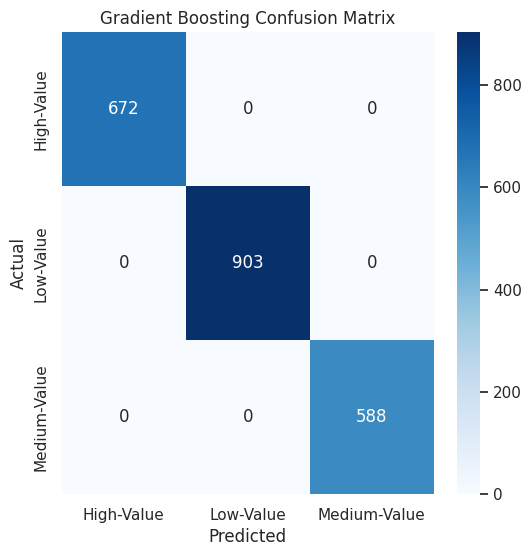

Support Vector Machine Accuracy: 0.7573
Support Vector Machine Classification Report:
              precision    recall  f1-score   support

  High-Value       0.99      0.97      0.98       672
   Low-Value       0.64      1.00      0.78       903
Medium-Value       0.82      0.14      0.24       588

    accuracy                           0.76      2163
   macro avg       0.82      0.70      0.67      2163
weighted avg       0.80      0.76      0.70      2163



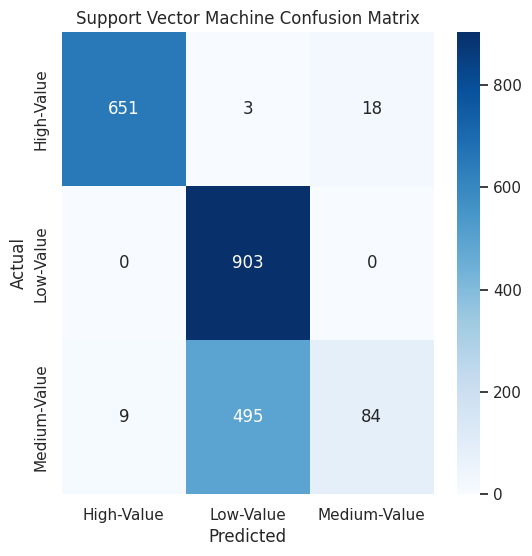

K-Nearest Neighbors Accuracy: 0.9884
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

  High-Value       0.99      0.99      0.99       672
   Low-Value       0.99      1.00      0.99       903
Medium-Value       0.99      0.97      0.98       588

    accuracy                           0.99      2163
   macro avg       0.99      0.99      0.99      2163
weighted avg       0.99      0.99      0.99      2163



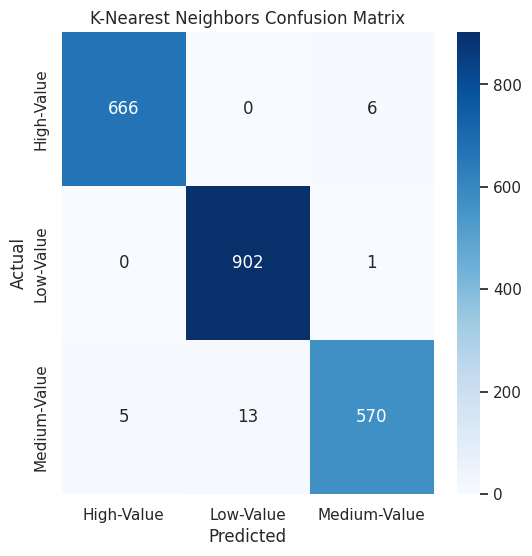

In [120]:
# Decision Tree Evaluation
evaluate_model(decision_tree, X_test, y_test, "Decision Tree")

# Random Forest Evaluation
evaluate_model(random_forest, X_test, y_test, "Random Forest")

# Logistic Regression Evaluation
evaluate_model(logistic_reg, X_test, y_test, "Logistic Regression")

# Gradient Boosting Evaluation
evaluate_model(gbm, X_test, y_test, "Gradient Boosting")

# Support Vector Machine Evaluation (scaled data)
evaluate_model(svm_model, X_test_scaled, y_test, "Support Vector Machine")

# K-Nearest Neighbors Evaluation (scaled data)
evaluate_model(knn, X_test_scaled, y_test, "K-Nearest Neighbors")

Quick Performance Summary of the Models:

Decision Tree ->

High-Value: 667 correctly predicted, 5 misclassified as Medium-Value.
Low-Value: 903 perfectly predicted (no errors).
Medium-Value: 584 correctly predicted, 4 misclassified as High-Value.

Random Forest->

High-Value: 671 correctly predicted, 1 misclassified as Medium-Value.
Low-Value: 903 perfectly predicted (no errors).
Medium-Value: 585 correctly predicted, 3 misclassified as High-Value.
Logistic Regression:

High-Value: 665 correctly predicted, 7 misclassified as Medium-Value.
Low-Value: 889 correctly predicted, 14 misclassified as Medium-Value.
Medium-Value: 555 correctly predicted, 33 misclassified (15 as High-Value, 18 as Low-Value).

Support Vector Machine (SVM) ->

High-Value: 651 correctly predicted, 21 misclassified (3 as Low-Value, 18 as Medium-Value).
Low-Value: 903 perfectly predicted (no errors).
Medium-Value: 84 correctly predicted, 504 misclassified (495 as Low-Value, 9 as High-Value).

Gradient Boosting ->

High-Value: 672 correctly predicted, 0 misclassified.
Low-Value: 903 perfectly predicted (no errors).
Medium-Value: 588 correctly predicted, 0 misclassified.

Gradient Boosting is clearly performing the best.

In [121]:
# Define the evaluate_model function
def evaluate_model(model, X_test, y_test, model_name):
    """
    Evaluates a machine learning model and prints the results.

    Args:
      model: The trained machine learning model.
      X_test: The features for testing.
      y_test: The target variable for testing.
      model_name: The name of the model.
    """

    y_pred = model.predict(X_test)
    print(f"\n{model_name} Classifier:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Make sure to import the necessary libraries
!pip install scikit-learn
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Now you can call the evaluate_model function
# Decision Tree Evaluation
evaluate_model(decision_tree, X_test, y_test, "Decision Tree")

# Random Forest Evaluation
evaluate_model(random_forest, X_test, y_test, "Random Forest")

# Logistic Regression Evaluation
evaluate_model(logistic_reg, X_test, y_test, "Logistic Regression")

# Gradient Boosting Evaluation
evaluate_model(gbm, X_test, y_test, "Gradient Boosting")

# Support Vector Machine Evaluation (scaled data)
evaluate_model(svm_model, X_test_scaled, y_test, "Support Vector Machine")

# K-Nearest Neighbors Evaluation (scaled data)
evaluate_model(knn, X_test_scaled, y_test, "K-Nearest Neighbors")


Decision Tree Classifier:
Accuracy: 0.9958391123439667
              precision    recall  f1-score   support

  High-Value       0.99      0.99      0.99       672
   Low-Value       1.00      1.00      1.00       903
Medium-Value       0.99      0.99      0.99       588

    accuracy                           1.00      2163
   macro avg       1.00      1.00      1.00      2163
weighted avg       1.00      1.00      1.00      2163


Random Forest Classifier:
Accuracy: 0.9981507165973186
              precision    recall  f1-score   support

  High-Value       1.00      1.00      1.00       672
   Low-Value       1.00      1.00      1.00       903
Medium-Value       1.00      0.99      1.00       588

    accuracy                           1.00      2163
   macro avg       1.00      1.00      1.00      2163
weighted avg       1.00      1.00      1.00      2163


Logistic Regression Classifier:
Accuracy: 0.9750346740638003
              precision    recall  f1-score   support

  High-Va